In [1]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=00e767ec891c3e85591605d2a98575c811b2e39bccf01c6a1704ae34e9c16f29
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

# imports
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import numpy as np
import os
from tabulate import tabulate
from PIL import Image, ImageDraw
import face_recognition

In [4]:
face_recognition.api.face_encodings

<function face_recognition.api.face_encodings(face_image, known_face_locations=None, num_jitters=1, model='small')>

Dataset: https://www.kaggle.com/datasets/zeinabartaill/presidents

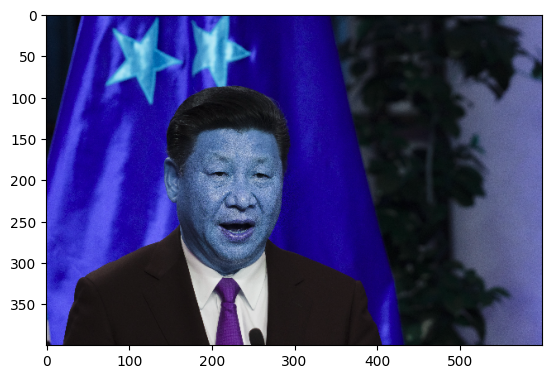

In [5]:
img1 = cv2.imread("/content/drive/MyDrive/archive/train/China/XJ1.jpg")
resized_img = cv2.resize(img1, (0, 0), fx=0.2, fy=0.2) # reduce notebook size
plt.imshow(resized_img)

In [6]:
%cd /content/drive/MyDrive/archive/train
!ls

/content/drive/MyDrive/archive/train
China  Germany	India  Japan  US


## Generate face encodings for all images

The dataset has different folders, each folder has images of the particular country.

Approach
- Iterate over all the images
- Store their image encodings
- Check for face similarrity with input images

In [7]:
# path1 = "China/XJ1.jpg"
test = face_recognition.api.face_encodings(resized_img)
test

[array([-0.04763245,  0.10494832,  0.03299144,  0.01363382, -0.04785681,
        -0.04093091, -0.00885839, -0.23598647,  0.11644437, -0.11287683,
         0.20538932, -0.10619977, -0.2127457 , -0.12995751,  0.04173234,
         0.217271  , -0.20870848, -0.16722569, -0.08415452, -0.03787658,
        -0.02313966, -0.03112503,  0.04769937, -0.03292184, -0.00166161,
        -0.35453045, -0.08462194, -0.08409581,  0.08087339, -0.00134571,
        -0.03288615,  0.05476017, -0.20444298, -0.10926518,  0.06673516,
         0.10446785, -0.033499  , -0.0567537 ,  0.18381938, -0.07044175,
        -0.17851298,  0.03677088,  0.04870597,  0.19096833,  0.15941811,
         0.05711976,  0.03166612, -0.17053068,  0.14106423, -0.13318591,
        -0.02401166,  0.11143301,  0.09593868,  0.06809463,  0.00992017,
        -0.0947105 ,  0.03120852,  0.07229745, -0.14894608, -0.01705588,
         0.15147375, -0.02790675, -0.03348487, -0.06513779,  0.21599403,
         0.04132752, -0.09120549, -0.13662247,  0.1

In [8]:
test = np.array(test)
test.shape

(1, 128)

In [9]:
bounding_box = face_recognition.api.batch_face_locations([resized_img]) # expects an array
bounding_box

[[(158, 289, 276, 171)]]

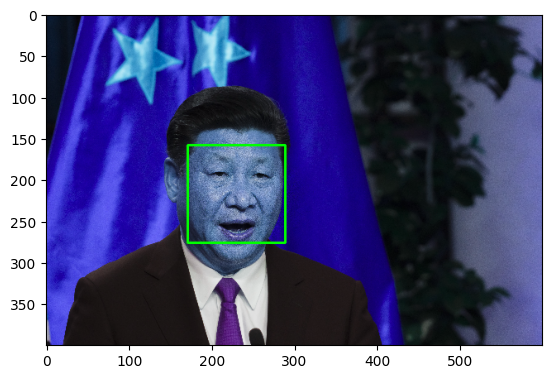

In [10]:
top, right, bottom, left = bounding_box[0][0]

cv2.rectangle(resized_img, (left, top), (right, bottom), (0, 255, 0), 2)  # color code for green
plt.imshow(resized_img)

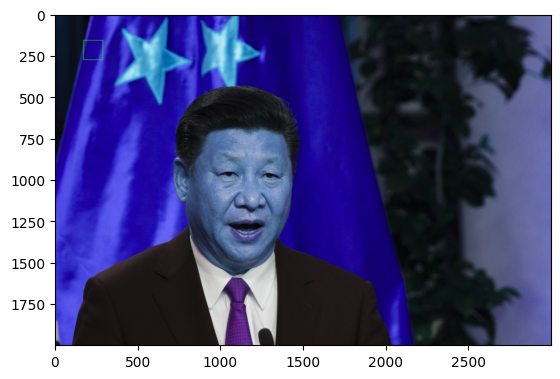

In [11]:
temp_img = img1
cv2.rectangle(temp_img, (left, top), (right, bottom), (0, 255, 0), 2)  # color code for green
plt.imshow(temp_img)

So the rectangle returned from face encodings are positions in the  resized image, and not the actual image !

Lets try encoding all the faces now

In [12]:
!ls

China  Germany	India  Japan  US


In [46]:
root_directory = os.getcwd()

images_dict = {}
images_imread = []

small_width = 100
small_height = 100

for folder in os.listdir(root_directory):
    folder_path = os.path.join(root_directory, folder)
    if os.path.isdir(folder_path):
        images = []
        for image_file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_file)
            image = cv2.imread(image_path)
            resized_img = cv2.resize(image, (small_width, small_height))
            images_imread.append(resized_img)
            if image is not None:
                images.append(image)
        images_dict[folder] = images


In [47]:
images_dict.keys(), len(images_imread)

(dict_keys(['US', 'India', 'Germany', 'Japan', 'China']), 50)

In [27]:
images_imread = np.array(images_imread)

In [28]:
images_imread.shape # 50 images of size 100x100 with 3 color channels

(50, 100, 100, 3)

In [42]:
face_encodes, shapes = [], []
for image in images_imread:
  encode = face_recognition.api.face_encodings(image)
  shapes.append(len(encode))
  face_encodes.append(encode)


In [45]:
print(shapes)

[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0]


In [51]:
shapes = [x for x in face_encodes if len(x) > 0]
shapes = np.array(shapes)
shapes.shape

(20, 1, 128)

In [52]:
# a total of 20 images had encodings when resized to 100 x 100, lets try resizing to 400 x 400

In [74]:
root_directory = os.getcwd()

images_dict = {}
images_imread = []

small_width = 400
small_height = 400

for folder in os.listdir(root_directory):
    folder_path = os.path.join(root_directory, folder)
    if os.path.isdir(folder_path):
        images = []
        for image_file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_file)
            image = cv2.imread(image_path)
            resized_img = cv2.resize(image, (small_width, small_height))
            images_imread.append([resized_img, folder_path])
            if image is not None:
                images.append(image)
        images_dict[folder] = images


In [93]:
face_encodes, shapes = [], []
for image in images_imread:
  encode = face_recognition.api.face_encodings(image[0])
  shapes.append(len(encode))
  face_encodes.append([encode, image[1]])



In [94]:
encode_path = [x for x in face_encodes if len(x[0]) == 1 and len(x) == 2] # Discard pictures where no faces detected and with more than one face

In [97]:
len(encode_path)

42

In [90]:
# 42 such images were present with 1 face and detectable at size 400x400, big bump from the number 20

In [108]:
encoding_map = {}
for x in encode_path:
    if x[1] not in encoding_map:
        encoding_map[x[1]] = [x[0]]
    else:
        encoding_map[x[1]].append(x[0])


In [109]:
encoding_map.keys()

dict_keys(['/content/drive/MyDrive/archive/train/US', '/content/drive/MyDrive/archive/train/India', '/content/drive/MyDrive/archive/train/Germany', '/content/drive/MyDrive/archive/train/Japan', '/content/drive/MyDrive/archive/train/China'])

In [110]:
for key in encoding_map.keys(): print(len(encoding_map[key]), sep=" ")

8
9
7
9
9


# Predict Images



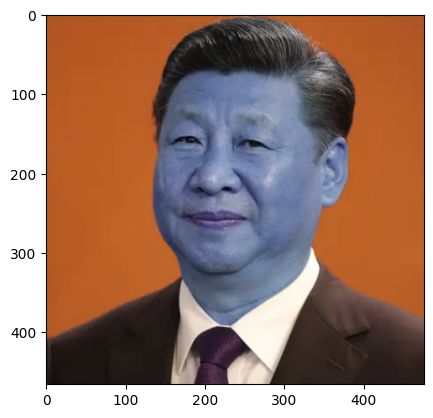

In [111]:
path = "/content/xijpg.png"
img = cv2.imread(path)
plt.imshow(img)

In [117]:
resized_img = cv2.resize(img, (small_width, small_height)) # same hieght as other inputs
test_encoding = face_recognition.api.face_encodings(resized_img)[0]

In [120]:
distances_map = {}

for key, face_encodings in encoding_map.items():
    distances = []
    for face_to_compare in face_encodings:
        distance = face_recognition.api.face_distance(test_encoding, face_to_compare)
        distances.append(distance)
    distances_map[key] = distances


In [131]:
for key, val in distances_map.items(): print(key[-7:], max(val))

rain/US [0.86855794]
n/India [0.83776121]
Germany [0.88452726]
n/Japan [0.75609794]
n/China [0.53260599]


## Results
The distance of the encoding is least for China, so the model works ! (Least distance is a measure of closeness of encoding here)

Lets try for a few more images

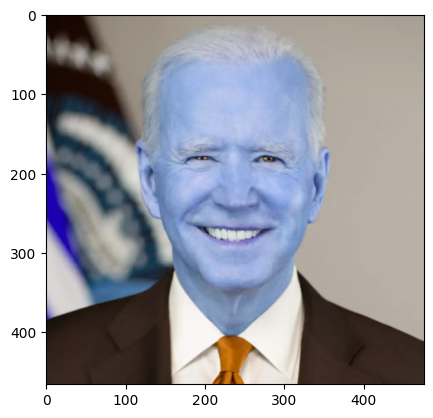

In [132]:
path = "/content/biden.png"
img = cv2.imread(path)
plt.imshow(img)

In [133]:
resized_img = cv2.resize(img, (small_width, small_height)) # same hieght as other inputs
test_encoding = face_recognition.api.face_encodings(resized_img)[0]

In [134]:
distances_map = {}

for key, face_encodings in encoding_map.items():
    distances = []
    for face_to_compare in face_encodings:
        distance = face_recognition.api.face_distance(test_encoding, face_to_compare)
        distances.append(distance)
    distances_map[key] = distances

for key, val in distances_map.items(): print(key[-7:], max(val))

rain/US [0.65135404]
n/India [0.82625587]
Germany [0.80951859]
n/Japan [0.8084449]
n/China [0.85374527]


It again showed the least distance with US, which is the ground, Lets try a random person

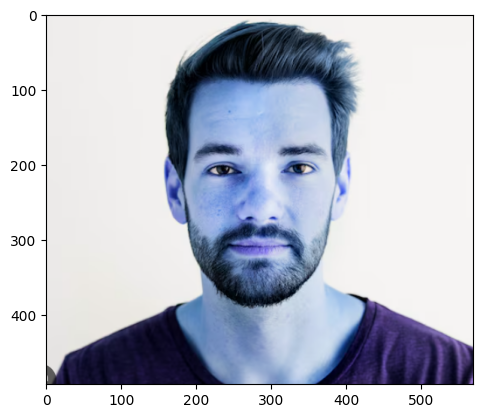

In [135]:
path = "/content/random.png"
img = cv2.imread(path)
plt.imshow(img)

In [136]:
resized_img = cv2.resize(img, (small_width, small_height)) # same hieght as other inputs
test_encoding = face_recognition.api.face_encodings(resized_img)[0]

In [137]:
distances_map = {}

for key, face_encodings in encoding_map.items():
    distances = []
    for face_to_compare in face_encodings:
        distance = face_recognition.api.face_distance(test_encoding, face_to_compare)
        distances.append(distance)
    distances_map[key] = distances

for key, val in distances_map.items(): print(key[-7:], max(val))

rain/US [0.9161759]
n/India [0.78666835]
Germany [0.83106558]
n/Japan [0.8358844]
n/China [0.81249933]


The distance is very high from all the classes, which is again what we wanted.

## Results
So we finally found a way to use face_encodings to extract facial features.


1) We start by resizing these faces to a fixed size and detect faces.

2) If faces are found , store their encodings along with their labels

3) On a every new input, apply the same resizing, and obtain face encoding. Apply distances function to find the nearest label and output the nearest label. Obviously reject the labels if all labels are above certain `threshold`.


## Future Work

- Obtain a proper size  for resizing
- Work with multiple faces
- Work with non-human faces
- Look for alternatives to facial_recognition since its hard to use TPU's on google collab


**Note**: All the image plots are out of color due to  matplot lib issue, the original images are colored and are attached to the repositry.